<a href="https://colab.research.google.com/github/samuelacquatey/customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Data

In [1]:
import pandas as pd
import numpy as np

# Load the training and testing data
train_data = pd.read_csv('customer_segmentation_train.csv')
test_data = pd.read_csv('customer_segmentation_test.csv')

# Display the first few rows of the training and testing data
train_data.head(), test_data.head()


(       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
 0  462809    Male           No   22        No     Healthcare              1.0   
 1  462643  Female          Yes   38       Yes       Engineer              NaN   
 2  466315  Female          Yes   67       Yes       Engineer              1.0   
 3  461735    Male          Yes   67       Yes         Lawyer              0.0   
 4  462669  Female          Yes   40       Yes  Entertainment              NaN   
 
   Spending_Score  Family_Size  Var_1 Segmentation  
 0            Low          4.0  Cat_4            D  
 1        Average          3.0  Cat_4            A  
 2            Low          1.0  Cat_6            B  
 3           High          2.0  Cat_6            B  
 4           High          6.0  Cat_6            A  ,
        ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
 0  458989  Female          Yes   36       Yes    Engineer              0.0   
 1  458994    Male          Y

#Data Preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Combine train and test data for consistent preprocessing
combined_data = pd.concat([train_data.drop(columns=['Segmentation']), test_data], keys=['train', 'test'])

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data), columns=combined_data.columns)

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Spending_Score']:
    label_encoders[column] = LabelEncoder()
    combined_data_imputed[column] = label_encoders[column].fit_transform(combined_data_imputed[column])

# Normalize the data
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data_imputed.drop(columns=['ID']))

# Split the data back into train and test sets
train_data_scaled = combined_data_scaled[combined_data.index.get_level_values(0) == 'train']
test_data_scaled = combined_data_scaled[combined_data.index.get_level_values(0) == 'test']



#Clustering

In [3]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
train_clusters = kmeans.fit_predict(train_data_scaled)

# Add cluster labels to the original training data
train_data['Cluster'] = train_clusters
print(train_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  Cluster  
0            Low          4.0  Cat_4            D        1  
1        Average          3.0  Cat_4            A        0  
2            Low          1.0  Cat_6            B        3  
3           High          2.0  Cat_6            B        3  
4           High          6.0  Cat_6            A        0  


#Data Visualization

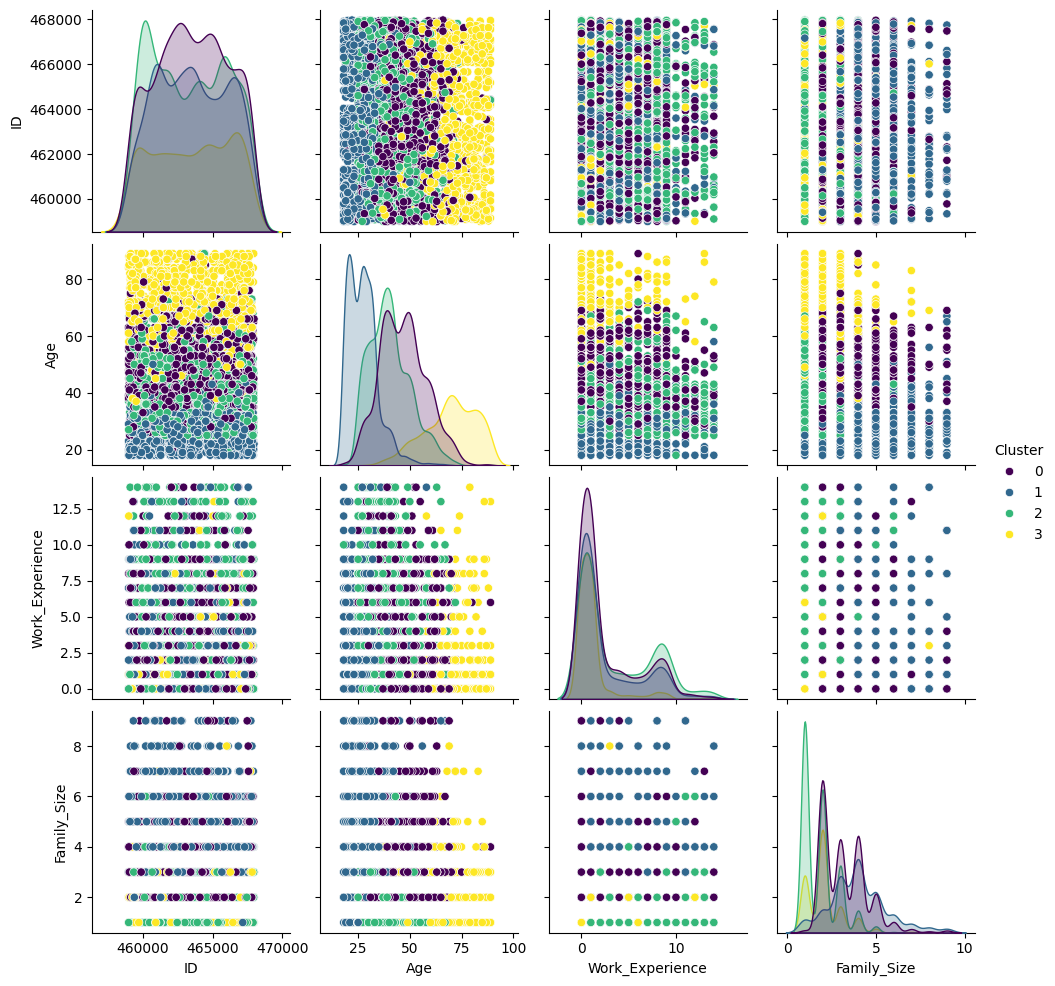

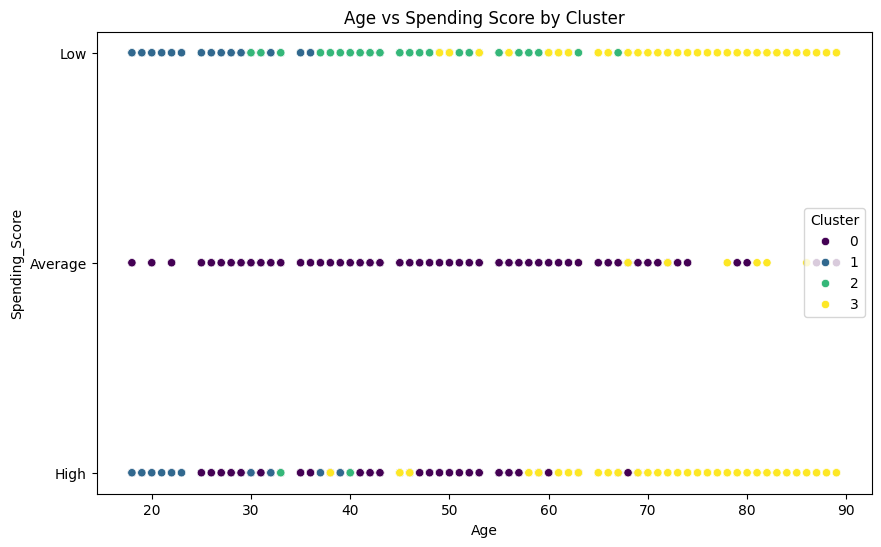

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot to visualize clusters
sns.pairplot(train_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

# Scatter plot of Age vs. Spending Score colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Age', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Age vs Spending Score by Cluster')
plt.show()


#Remade to handle overfitting and underfitting

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
TypeError: _PredictScorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/di

Cross-Validation Scores: [nan nan nan nan nan]
Silhouette Score: 0.1856736987714211


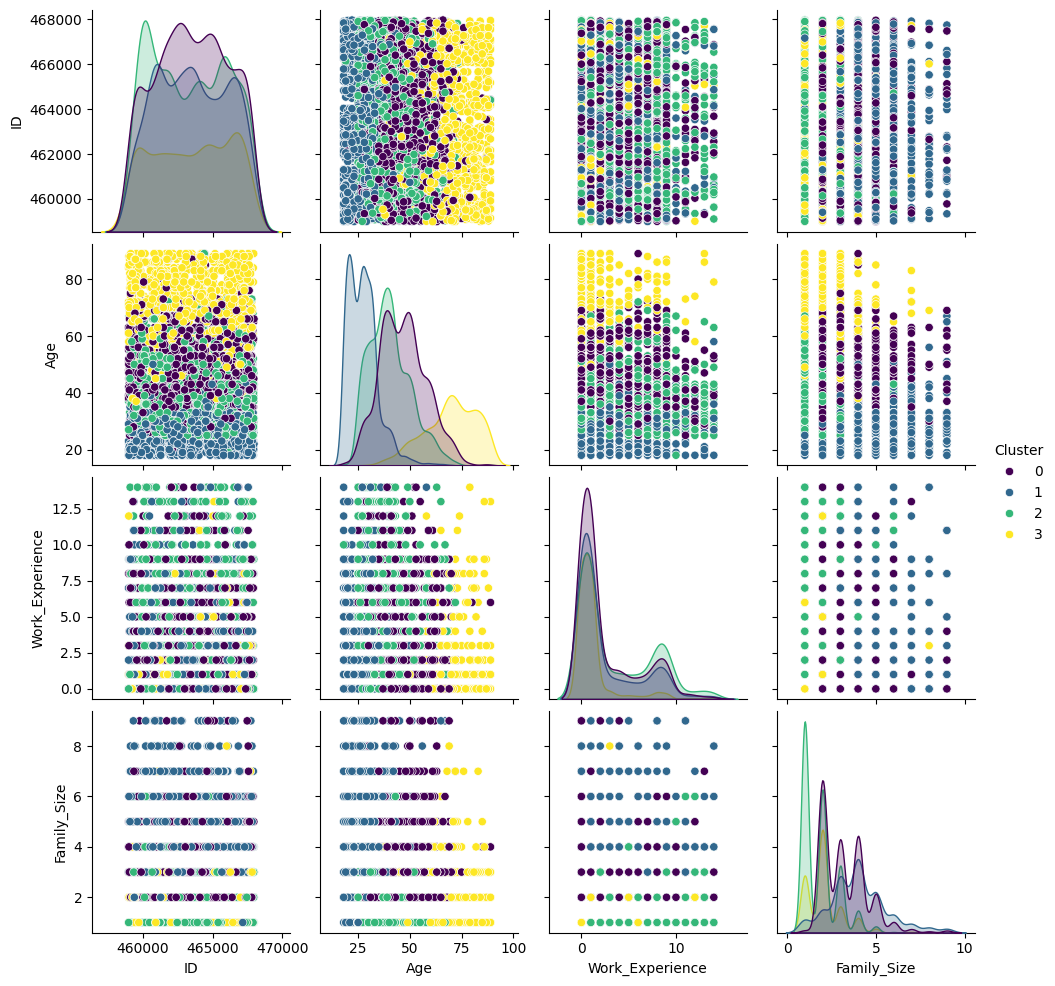

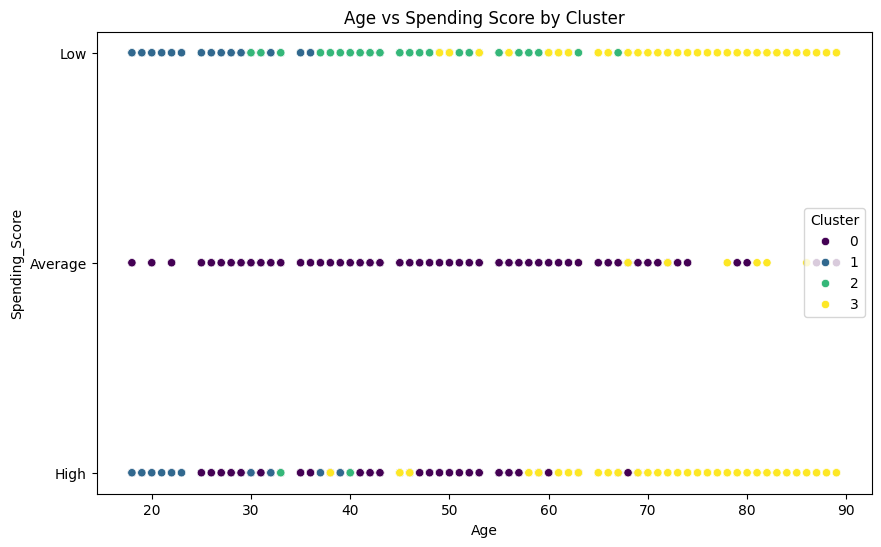

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv('customer_segmentation_train.csv')
test_data = pd.read_csv('customer_segmentation_test.csv')

# Preprocessing steps
combined_data = pd.concat([train_data.drop(columns=['Segmentation']), test_data], keys=['train', 'test'])
imputer = SimpleImputer(strategy='most_frequent')
combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data), columns=combined_data.columns)

label_encoders = {}
for column in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Var_1', 'Spending_Score']:
    label_encoders[column] = LabelEncoder()
    combined_data_imputed[column] = label_encoders[column].fit_transform(combined_data_imputed[column])

scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data_imputed.drop(columns=['ID']))

train_data_scaled = combined_data_scaled[combined_data.index.get_level_values(0) == 'train']
test_data_scaled = combined_data_scaled[combined_data.index.get_level_values(0) == 'test']

# K-Means Clustering with Cross-Validation
kmeans = KMeans(n_clusters=4, random_state=0)
cv_scores = cross_val_score(kmeans, train_data_scaled, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores: {-cv_scores}")

# Fit K-Means on the entire training data
kmeans.fit(train_data_scaled)
train_clusters = kmeans.predict(train_data_scaled)
train_data['Cluster'] = train_clusters

# Evaluate clustering
silhouette_avg = silhouette_score(train_data_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters
sns.pairplot(train_data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Age', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Age vs Spending Score by Cluster')
plt.show()
